<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

#### Load the csv file

In [1]:
# type your code here
import numpy as np

import pandas as pd
# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


# import train-test split 
from sklearn.model_selection import train_test_split

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [2]:
df_bank=pd.read_csv('bank.csv')
df_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


In [3]:
df_bank1=df_bank.copy()

In [4]:
df_bank.y.value_counts()

no     5000
yes    4640
Name: y, dtype: int64

In [5]:
df_bank.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

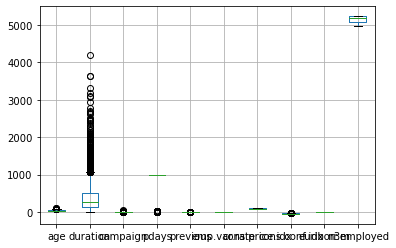

In [7]:
# type your code here
df_bank.boxplot()

Q1 = df_bank.quantile(0.25)

Q3 = df_bank.quantile(0.75)

IQR = Q3 - Q1

df_bank = df_bank[~((df_bank < (Q1 - 1.5 * IQR)) | (df_bank > (Q3 + 1.5 * IQR))).any(axis=1)]

df_bank = df_bank.reset_index(drop=True)

df_bank.shape

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df_bank.y.value_counts()

no     5000
yes    4640
Name: y, dtype: int64

In [9]:
# type your code here
# store the target variable "y" in a dataframe 'df_target'
df_target = df_bank['y'].copy()

# store all the independent variables in a dataframe 'df_feature' 
# drop the column "y" using drop()
# 'axis = 1' drops the specified column
df_feature = df_bank.drop('y', axis = 1)

In [10]:


# if the value in the target variable is 'yes' then replace it with 1 else with 0
for i in range(len(df_target)):
    if df_target[i] == 'yes':
        df_target[i] = 1
    else:
        df_target[i] = 0
        
# change the datatype of the target variable to integer
df_target = df_target.astype('int')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
df_feature.std()

age                11.901274
duration          354.768370
campaign            2.384519
pdays             306.531615
previous            0.684605
emp.var.rate        1.717852
cons.price.idx      0.631366
cons.conf.idx       5.322795
euribor3m           1.886179
nr.employed        86.347481
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

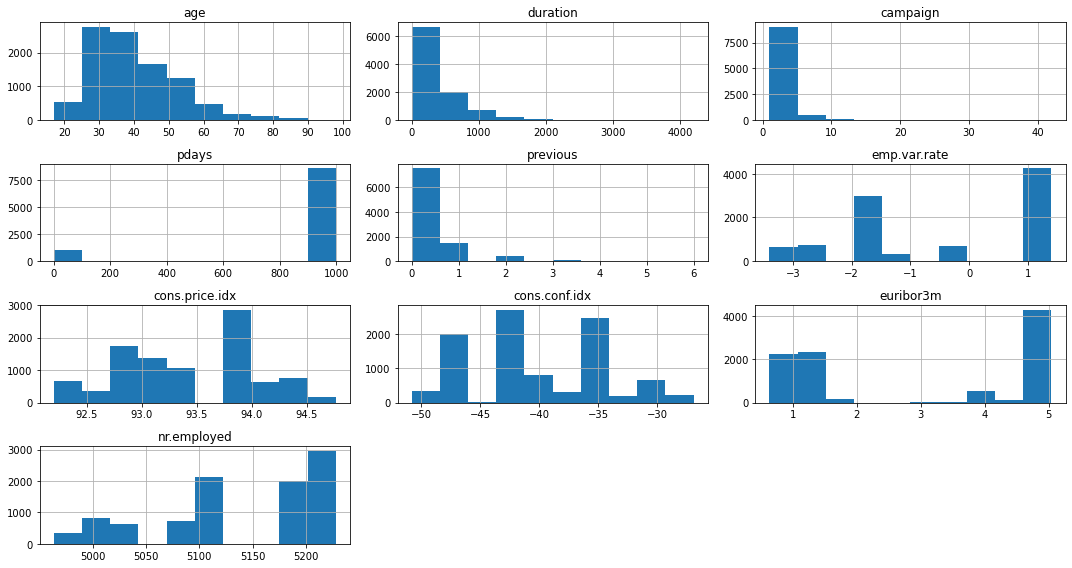

In [14]:
# type your code here

plt.rcParams['figure.figsize']=[15,8]
df_feature.hist()
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

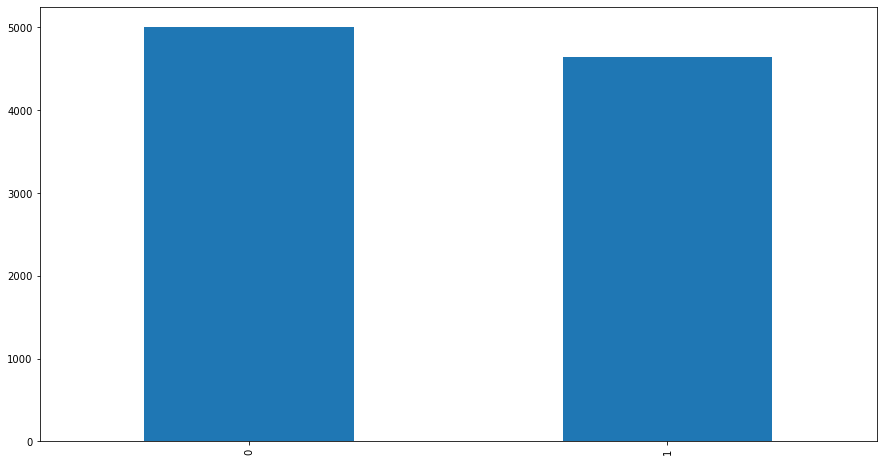

In [15]:
# type your code here
df_target.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='y', ylabel='count'>

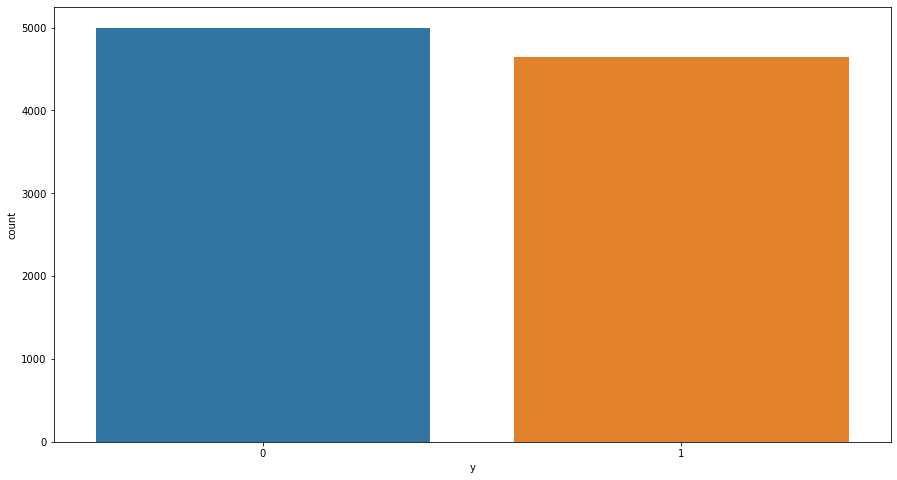

In [16]:
sns.countplot(df_target)

In [17]:
df_target.value_counts()

0    5000
1    4640
Name: y, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here
from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler()
num_scaled=X_scaler.fit_transform(df_feature)
X=pd.DataFrame(num_scaled,columns=df_feature.columns)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.696316,-0.492076,-0.146440,0.345494,-0.447172,0.908285,0.805042,0.726230,0.983194,0.620697
1,-0.696316,0.877903,3.208708,0.345494,-0.447172,1.082931,0.684662,-0.457420,1.037275,1.050379
2,0.396061,-0.943098,2.369921,0.345494,-0.447172,1.082931,-0.066130,0.782594,1.038865,1.050379
3,-0.612287,0.057607,-0.565833,-2.897406,2.474374,-0.372451,1.766500,-1.735011,-1.045350,-2.012985
4,0.564119,1.475507,-0.146440,0.345494,1.013601,-0.779958,-0.650607,-1.284096,-0.842284,-0.443662


<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [40]:
# type your code here
X_train, X_test, y_train, y_test=train_test_split(X,df_target, random_state=10, test_size=0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7712, 10)
y_train (7712,)
X_test (1928, 10)
y_test (1928,)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [43]:
# define a to plot a confusion matrix for the model

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()#### Define a function to plot the confusion matrix.

In [44]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [41]:
# type your code here
from sklearn.neighbors import KNeighborsClassifier

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# type your code here
knk=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model10=knk.fit(X_train,y_train)
y_pred=model10.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.8682572614107884


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# type your code here
confusion_matrix(y_test,y_pred)

array([[860, 142],
       [112, 814]], dtype=int64)

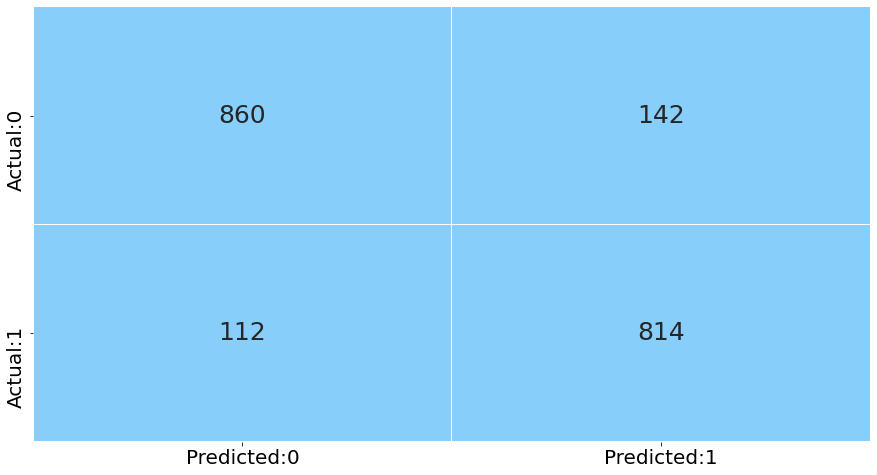

In [54]:
plot_confusion_matrix(model10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [55]:
# type your code here
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier(n_jobs=-1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 15} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# type your code here
knn_classification = KNeighborsClassifier(n_neighbors = knn_grid.best_params_['n_neighbors'], 
                                          metric=knn_grid.best_params_['metric'])

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

# predict the attrition for test set
y_pred = knn_model.predict(X_test)

# pass the actual and predicted target values to the accuracy_score()
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8858921161825726


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

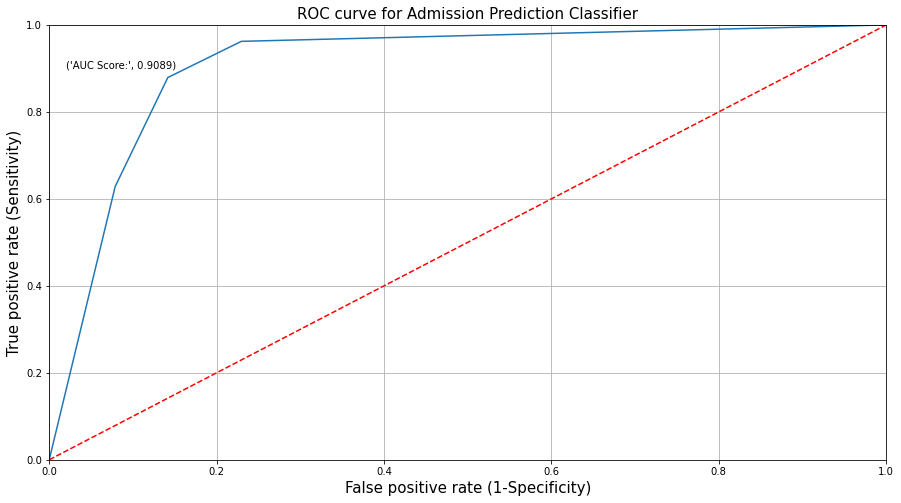

In [57]:
# type your code here
plot_roc(model10)

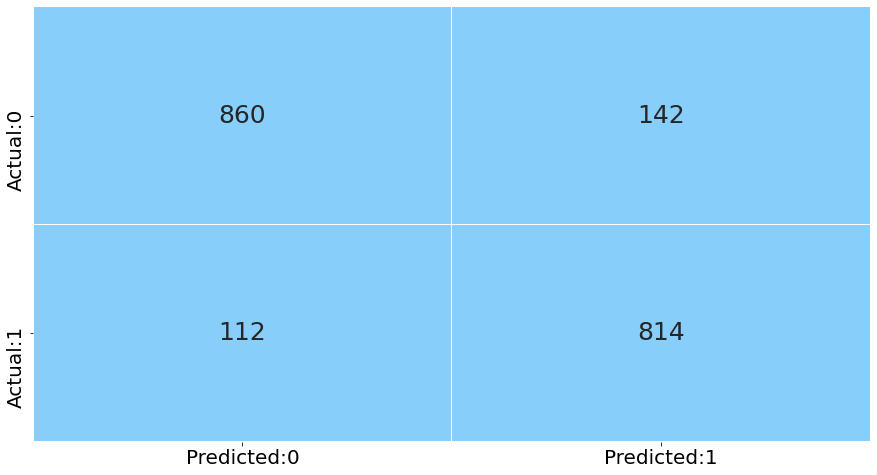

In [58]:
plot_confusion_matrix(model10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# type your code here
cm = confusion_matrix(y_pred, y_test)

total = cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]

# find the percentage of correctly classified observations
# round the result upto 2 decimal points
correct_classified_percentage = ((cm[0][0]+cm[1][1])/total)*100
print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2))

# find the percentage of  misclassified observations
# round the result upto 2 decimal points
misclassified_percentage = ((cm[0][1]+cm[1][0])/total)*100
print("Percentage of misclassified observations: ", round(misclassified_percentage, 2))

Percentage of correctly classified observations:  88.59
Percentage of misclassified observations:  11.41


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:

# type your code here
# consider an empty list to store the accuracy
accuracy = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean', n_jobs=-1)
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 3-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 3, n_jobs=-1)
    
    # calculate the mean score
    score = score.mean()
    
    # append the accuracy 
    accuracy.append(score)

accuracy

[0.8287076596639865,
 0.8543814803548105,
 0.8584008200819174,
 0.8650142439794153,
 0.8656624497223092,
 0.8663104032254404,
 0.8664401049115623,
 0.8669589621040025,
 0.865013789947842,
 0.8656621470345938,
 0.865013890843747,
 0.8655325462443769]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

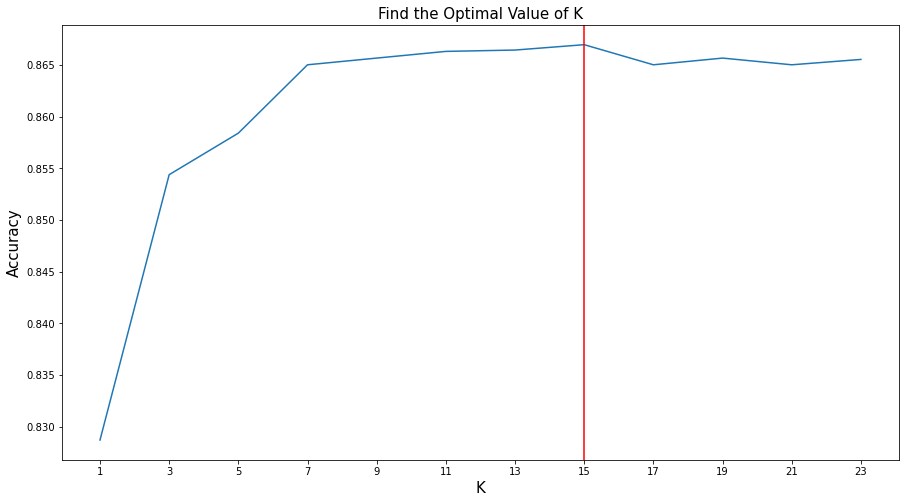

In [61]:
# type your code here
# plot the accuracy for different values of K 
plt.plot(range(1,25,2), accuracy)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Find the Optimal Value of K', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 15, color = 'red')

# display the plot
plt.show()

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# type your code here
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

# predict the attrition for test set
y_pred = gnb_model.predict(X_test)

# print the classification report 
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1002
           1       0.81      0.75      0.78       926

    accuracy                           0.80      1928
   macro avg       0.80      0.79      0.80      1928
weighted avg       0.80      0.80      0.80      1928



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

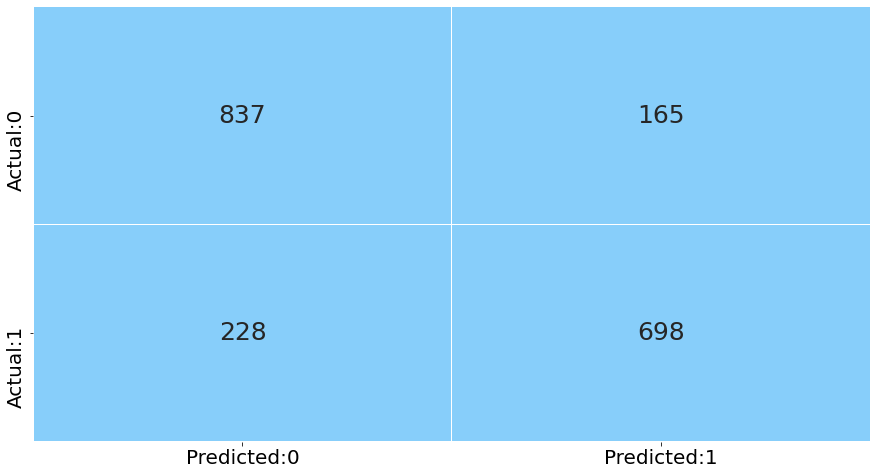

In [64]:
# type your code here
plot_confusion_matrix(gnb_model)

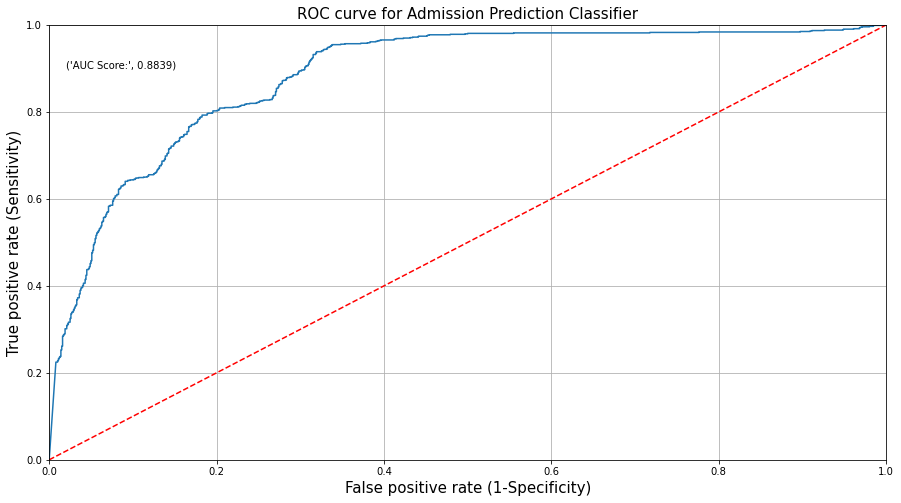

In [66]:
plot_roc(gnb_model)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# type your code here
gnb = GaussianNB()
   
# fit the model using 'cross_val_score'
# pass the gnb model as 'estimator'
# use 10-fold cross validation
score = cross_val_score(gnb, X_train, y_train, cv = 10)

# calculate the mean score
score = score.mean()

print("Accuracy after 10 fold cross validation: ", round(score, 2))

Accuracy after 10 fold cross validation:  0.79
